<a href="https://colab.research.google.com/github/ac-26/Telecom-Customer-Churn-Prediction/blob/main/telecom_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom Customer Churn Analysis Project**
## **Final ROC-AUC -> 84.20**
## **By-> Arnav Chopra**
## **CSI ID-> CT_CSI_DS_4264**

###I have also deployed it publically using streamlit so please do visit this link for ease and the code is below..

https://arnavchopra-ct-csi-ds-4264-telecom-churn.streamlit.app/

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [137]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [138]:
data_url = "https://raw.githubusercontent.com/ac-26/CSI-25/refs/heads/main/Telco-Customer-Churn.csv"

In [139]:
df = pd.read_csv(data_url)

## **Exploratory Data Analysis (EDA)**

In [140]:
df.shape

(7043, 21)

In [141]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [142]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### **Monthly charges is integer type and total charges is object type. We will have to handle this**

In [144]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [145]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [146]:
total_customers = len(df)
churned_customers = (df['Churn'] == 'Yes').sum()
churn_rate = (churned_customers / total_customers) * 100
churn_rate

np.float64(26.536987079369588)

### **We see that 26.5% of customers have churned, this shows class imbalance and we will have to handle it later**

In [147]:
print(f"Empty strings: {(df['TotalCharges'] == '').sum()}")
print(f"Space values: {(df['TotalCharges'] == ' ').sum()}")

Empty strings: 0
Space values: 11


### **These have space values lets analyse more closely if there is a reason for it to be like this or we can delete/impute them**

In [148]:
space_rows = df[df['TotalCharges'] == ' ']
space_rows[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

,customerID,tenure,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,0,52.55,,No
753,3115-CZMZD,0,20.25,,No
936,5709-LVOEQ,0,80.85,,No
1082,4367-NUYAO,0,25.75,,No
1340,1371-DWPAZ,0,56.05,,No
3331,7644-OMVMY,0,19.85,,No
3826,3213-VVOLG,0,25.35,,No
4380,2520-SGTTA,0,20.00,,No
5218,2923-ARZLG,0,19.70,,No
6670,4075-WKNIU,0,73.35,,No


### **So now clearly there is a reason for those to be empty spaces. These 11 records are those people who have just joined the service and they havent been billed yet. So instead of deleting it all together lets keep all these records and replace empty space with 0.**

In [149]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')

### **Fixing the datatype of the column**

In [150]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

### **Analysing the numerical columns**

In [151]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [152]:
df[numerical_cols].describe().round(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76,2279.73
std,0.37,24.56,30.09,2266.79
min,0.00,0.00,18.25,0.00
25%,0.00,9.00,35.50,398.55
50%,0.00,29.00,70.35,1394.55
75%,0.00,55.00,89.85,3786.60
max,1.00,72.00,118.75,8684.80


### **Visualising numerical features**

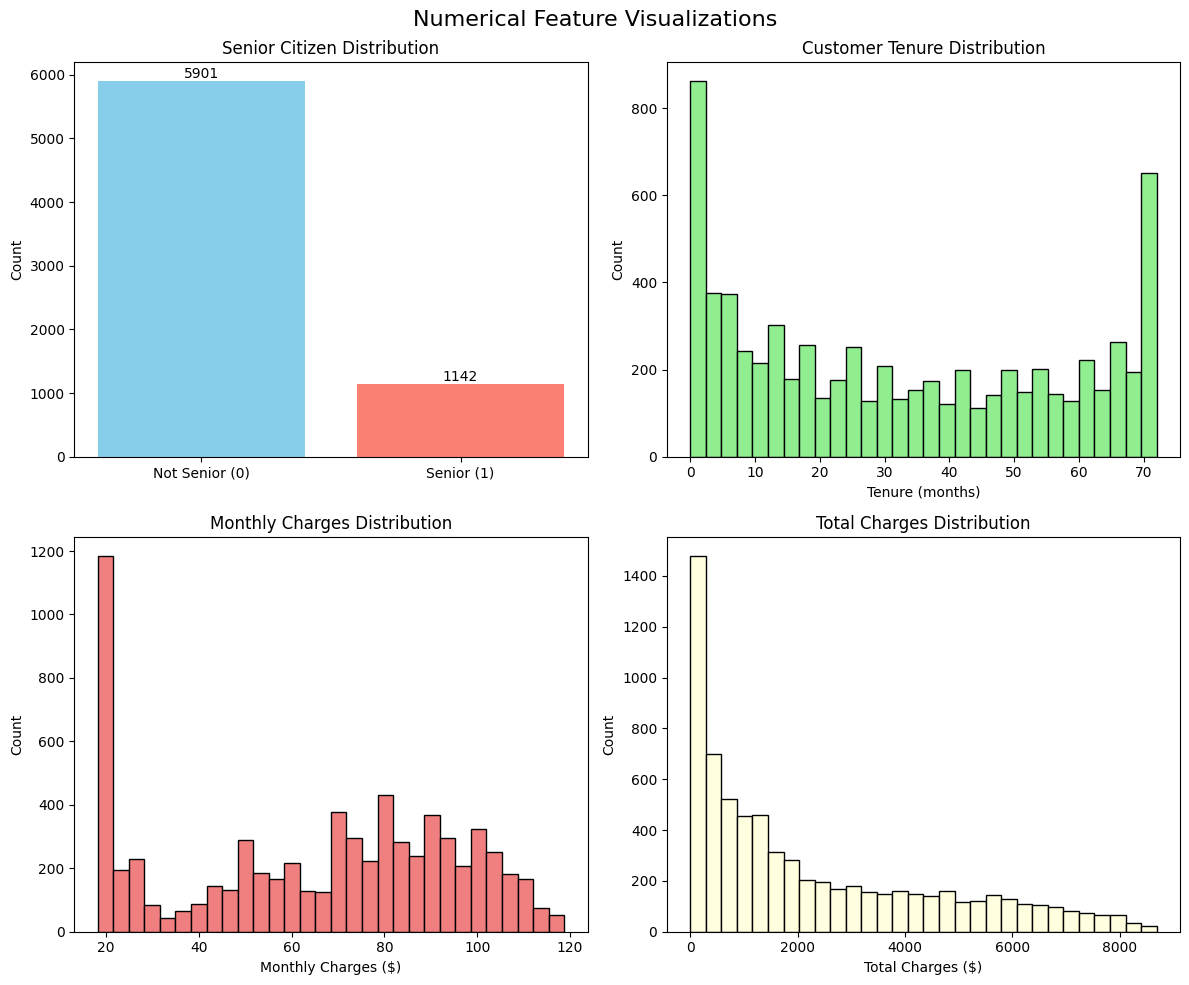

In [153]:
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Numerical Feature Visualizations', fontsize=16)

#senior citizen column
ax1 = axes[0, 0]
senior_counts = df['SeniorCitizen'].value_counts()
ax1.bar(['Not Senior (0)', 'Senior (1)'], senior_counts.values, color=['skyblue', 'salmon'])
ax1.set_title('Senior Citizen Distribution')
ax1.set_ylabel('Count')
for i, v in enumerate(senior_counts.values):
    ax1.text(i, v + 50, str(v), ha='center')

#tenure
ax2 = axes[0, 1]
ax2.hist(df['tenure'], bins=30, color='lightgreen', edgecolor='black')
ax2.set_title('Customer Tenure Distribution')
ax2.set_xlabel('Tenure (months)')
ax2.set_ylabel('Count')

#monthly charges
ax3 = axes[1, 0]
ax3.hist(df['MonthlyCharges'], bins=30, color='lightcoral', edgecolor='black')
ax3.set_title('Monthly Charges Distribution')
ax3.set_xlabel('Monthly Charges ($)')
ax3.set_ylabel('Count')

#total charges
ax4 = axes[1, 1]
ax4.hist(df['TotalCharges'], bins=30, color='lightyellow', edgecolor='black')
ax4.set_title('Total Charges Distribution')
ax4.set_xlabel('Total Charges ($)')
ax4.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [154]:
senior_rate = senior_counts[1] / senior_counts.sum() * 100
senior_rate

np.float64(16.21468124378816)

*   **There are 16% senior citizens - heavily skewed towards younger audience**
*   **Average customer stays 32 months, also there are lot of new customers (0-3 months)**
*   **Total charges also have high variation**




### **Analysing these features with Churn**

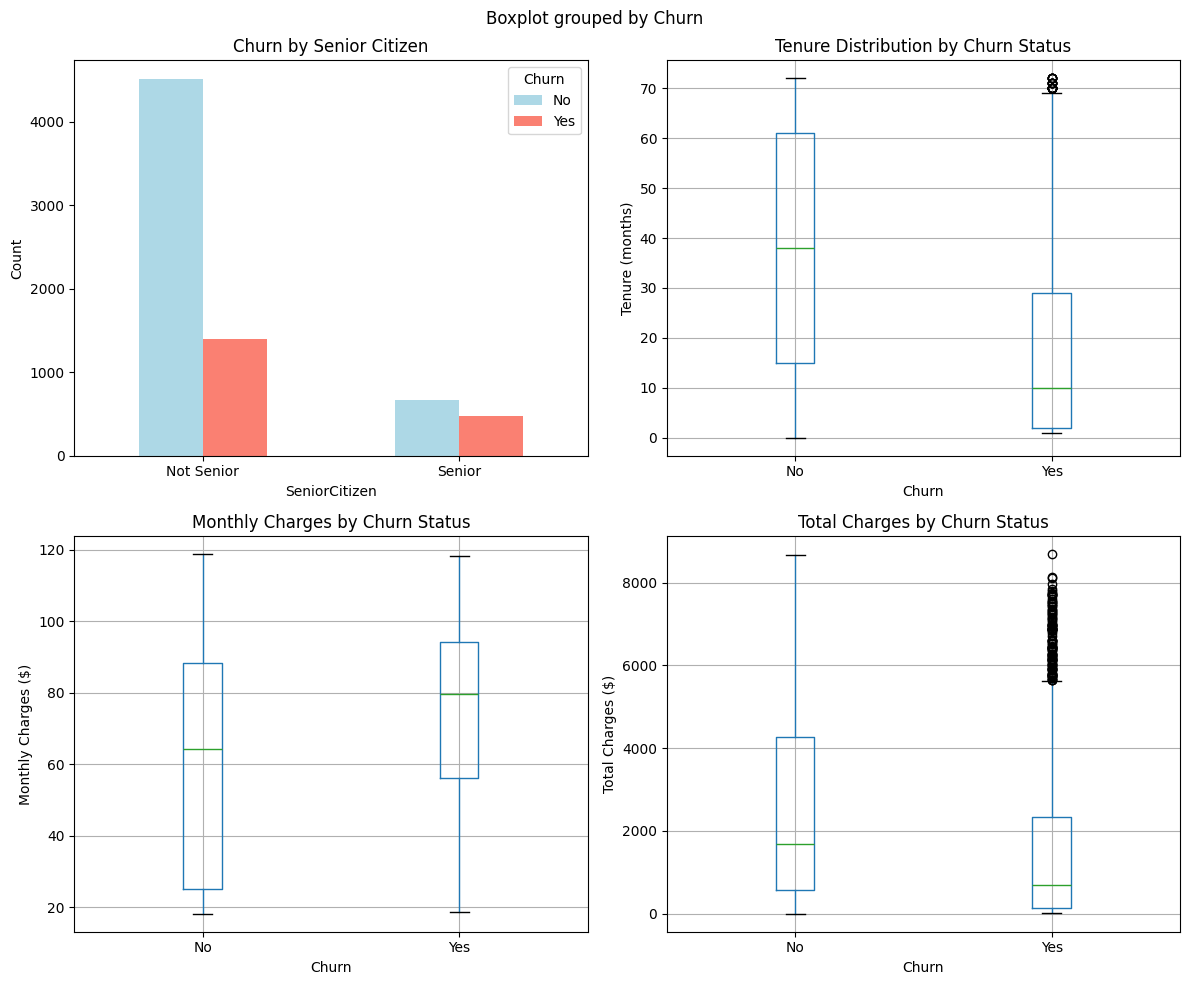

In [155]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#churn with senior citizen
ax1 = axes[0, 0]
churn_senior = pd.crosstab(df['SeniorCitizen'], df['Churn'])
churn_senior.plot(kind='bar', ax=ax1, color=['lightblue', 'salmon'])
ax1.set_xticklabels(['Not Senior', 'Senior'], rotation=0)
ax1.set_title('Churn by Senior Citizen')
ax1.set_ylabel('Count')
ax1.legend(title='Churn')

#churn by tenure
ax2 = axes[0, 1]
df.boxplot(column='tenure', by='Churn', ax=ax2)
ax2.set_title('Tenure Distribution by Churn Status')
ax2.set_xlabel('Churn')
ax2.set_ylabel('Tenure (months)')
plt.sca(ax2)
plt.xticks([1, 2], ['No', 'Yes'])

#churn by monthly charges
ax3 = axes[1, 0]
df.boxplot(column='MonthlyCharges', by='Churn', ax=ax3)
ax3.set_title('Monthly Charges by Churn Status')
ax3.set_xlabel('Churn')
ax3.set_ylabel('Monthly Charges ($)')
plt.sca(ax3)
plt.xticks([1, 2], ['No', 'Yes'])

#churn by total charges
ax4 = axes[1, 1]
df.boxplot(column='TotalCharges', by='Churn', ax=ax4)
ax4.set_title('Total Charges by Churn Status')
ax4.set_xlabel('Churn')
ax4.set_ylabel('Total Charges ($)')
plt.sca(ax4)
plt.xticks([1, 2], ['No', 'Yes'])

plt.tight_layout()
plt.show()

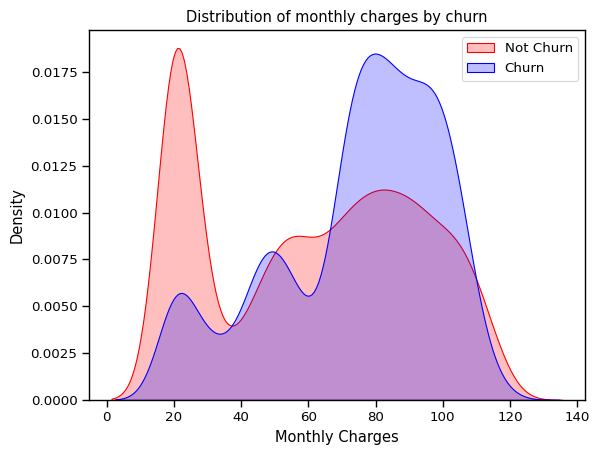

In [156]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

### **To make any more guesses we will have to calculate rate of each plot**

In [157]:
#churn rate by senior citizen
churn_by_senior = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
churn_by_senior.index = ['Not Senior', 'Senior']
churn_by_senior.round(2)

Churn,No,Yes
Not Senior,76.39,23.61
Senior,58.32,41.68


*   **Senior Citizen: Senior Citizen are more likely to churn, there can be many reasons to that for example they might not be comfortable with the pricing or they might need different servies as compared to younger audiences**
*   **Tenure: Customers who churn have much shorter tenure (10 months) compared to those who stay (38 months)**
*   **Monthly Charges: Churned customers pay higher monthly charges (80) as compared to non-churned (65)**
*   **Total Charges: Churned customers have much lower total charges which makes sense given their shorter tenure too**



### **I also observe some outliers in the box plot for tenure vs churn**

In [158]:
#this means there also exist long term customers who eventually churned, this tells me that this dataste is not so simple after all
churned_customers = df[df['Churn'] == 'Yes']
churned_customers['tenure'].describe()

,tenure
count,1869.000000
mean,17.979133
std,19.531123
min,1.000000
25%,2.000000
50%,10.000000
75%,29.000000
max,72.000000


In [159]:
high_tenure_churners = df[(df['tenure'] > 60) & (df['Churn'] == 'Yes')]
print(f"Number of long term customers who left {len(high_tenure_churners)}")

Number of long term customers who left 93


In [160]:
high_tenure_churners[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges','Contract', 'InternetService', 'PaymentMethod']].sort_values('tenure', ascending=False).head()

,customerID,tenure,MonthlyCharges,TotalCharges,Contract,InternetService,PaymentMethod
4610,2889-FPWRM,72,117.80,8684.80,One year,Fiber optic,Bank transfer (automatic)
3890,3886-CERTZ,72,109.25,8109.80,One year,Fiber optic,Electronic check
4513,8580-QVLOC,72,92.45,6440.25,Two year,DSL,Credit card (automatic)
3111,8809-RIHDD,72,103.40,7372.65,Two year,Fiber optic,Electronic check
3439,0917-EZOLA,72,104.15,7689.95,Two year,Fiber optic,Bank transfer (automatic)


### **Checking out where exactly churn is happening the most**

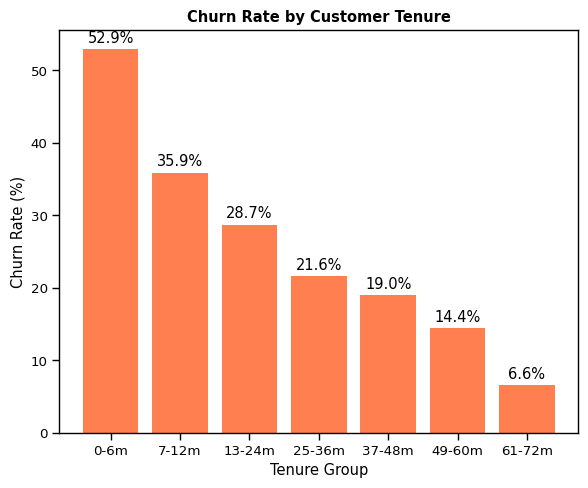

In [161]:
#binning tenure for visualisation
tenure_bins = [0, 6, 12, 24, 36, 48, 60, 72]
tenure_labels = ['0-6m', '7-12m', '13-24m', '25-36m', '37-48m', '49-60m', '61-72m']
df['tenure_group'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels, include_lowest=True)

#churn rate by bins
churn_by_tenure_group = df.groupby('tenure_group').agg({
    'Churn': ['count', lambda x: (x == 'Yes').sum(), lambda x: (x == 'Yes').mean() * 100]
}).round(1)
churn_by_tenure_group.columns = ['Total_Customers', 'Churned', 'Churn_Rate_%']


fig, ax1 = plt.subplots(1, 1, figsize=(6, 5))

#bar chart of churn rate and tenure bins
tenure_groups = churn_by_tenure_group.index
churn_rates = churn_by_tenure_group['Churn_Rate_%']
bars = ax1.bar(tenure_groups, churn_rates, color='coral')
ax1.set_ylabel('Churn Rate (%)')
ax1.set_title('Churn Rate by Customer Tenure', fontweight='bold')
ax1.set_xlabel('Tenure Group')

#adding values on top of bars
for bar, rate in zip(bars, churn_rates):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{rate:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### **So now clearly we know that cutomers who are early in their tenure are more likely to churn. Those rows which we saw above with high tenure and churn are just outliers..we cant remove them also because they are high value rows with high total charges so lets keep it for now**

### **Analysing Categorical Features with Churn**

In [162]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')

In [163]:
print("Contract type distribution:")
df['Contract'].value_counts()


Contract type distribution:


,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [164]:
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
contract_churn.round(1)

Churn,No,Yes
Contract,,
Month-to-month,57.3,42.7
One year,88.7,11.3
Two year,97.2,2.8


In [165]:
payment_counts = df['PaymentMethod'].value_counts()

payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'])

payment_churn['Total'] = payment_churn.sum(axis=1)
payment_churn['Churn_Rate_%'] = (payment_churn['Yes'] / payment_churn['Total'] * 100).round(1)

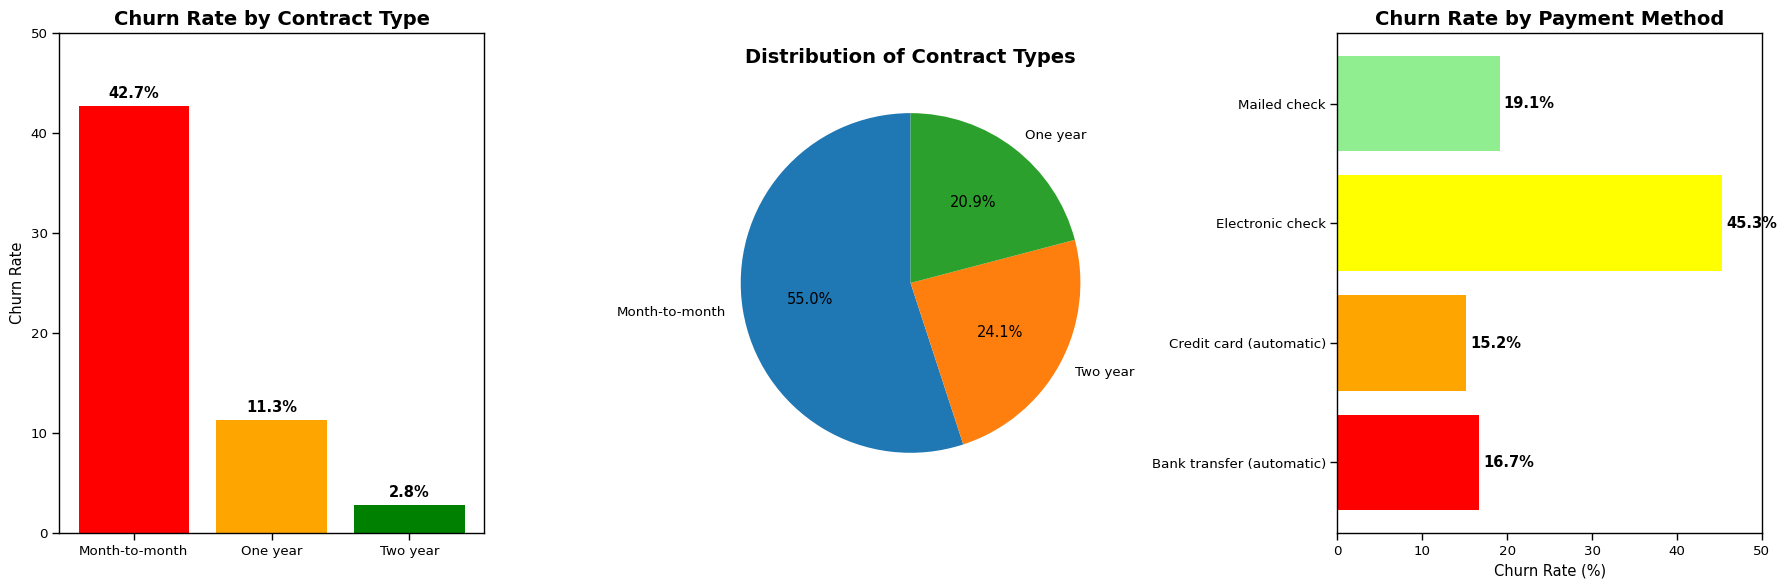

In [166]:
fig = plt.figure(figsize=(18, 6))

#contract tyoe and churn
ax1 = plt.subplot(1, 3, 1)
contract_churn_rates = [42.7, 11.3, 2.8]
contracts = ['Month-to-month', 'One year', 'Two year']
bars = ax1.bar(contracts, contract_churn_rates, color=['red', 'orange', 'green'])
ax1.set_ylabel('Churn Rate')
ax1.set_title('Churn Rate by Contract Type', fontweight='bold', fontsize=14)


for bar, rate in zip(bars, contract_churn_rates):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{rate}%', ha='center', va='bottom', fontweight='bold')
ax1.set_ylim(0, 50)

#contract type distribution
ax2 = plt.subplot(1, 3, 2)
contract_dist = df['Contract'].value_counts()
ax2.pie(contract_dist.values, labels=contract_dist.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Distribution of Contract Types', fontweight='bold', fontsize=14)

#payment method and churn
ax3 = plt.subplot(1, 3, 3)
payment_methods = payment_churn.index
churn_rates = payment_churn['Churn_Rate_%']
bars = ax3.barh(payment_methods, churn_rates, color=['red', 'orange', 'yellow', 'lightgreen'])
ax3.set_xlabel('Churn Rate (%)')
ax3.set_title('Churn Rate by Payment Method', fontweight='bold', fontsize=14)


for i, (method, rate) in enumerate(zip(payment_methods, churn_rates)):
    ax3.text(rate + 0.5, i, f'{rate}%', va='center', fontweight='bold')
ax3.set_xlim(0, 50)

plt.tight_layout()
plt.show()

*   **People with month to month contract have higher churn rates almost 50% which is comparitivley higher**
*   **Electronic check payment type has highe churn rate this is because maybe it is more tedious to manage as compared to automatic payment methods**




## **Data Preprocessing**

In [167]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-6m
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36m
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-6m
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48m
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-6m


In [168]:
df_processed = df.copy()

### **Removing customerid as it is not useful for prediction**

In [169]:
df_processed = df_processed.drop(['customerID', 'tenure_group'], axis=1)

In [170]:
df_processed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Feature Engineering**

### **Average charges per month**

In [171]:
df_processed['AvgMonthlyCharges'] = df_processed.apply(
    lambda x: x['TotalCharges'] / x['tenure'] if x['tenure'] > 0 else x['MonthlyCharges'],
    axis=1
)

### **Combining all services together and making it one column**

In [172]:
add_on_services = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_processed['NumAddOnServices'] = df_processed[add_on_services].apply(lambda x: sum(x == 'Yes'), axis=1)

In [173]:
df_processed[['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges', 'NumAddOnServices']].head(10)

,tenure,MonthlyCharges,TotalCharges,AvgMonthlyCharges,NumAddOnServices
0,1,29.85,29.85,29.850000,1
1,34,56.95,1889.50,55.573529,2
2,2,53.85,108.15,54.075000,2
3,45,42.30,1840.75,40.905556,3
4,2,70.70,151.65,75.825000,0
5,8,99.65,820.50,102.562500,4
6,22,89.10,1949.40,88.609091,3
7,10,29.75,301.90,30.190000,1
8,28,104.80,3046.05,108.787500,5
9,62,56.15,3487.95,56.257258,2


### **All of them seem to be working fine now lets do encoding**

In [174]:
for col in categorical_cols:
    unique_vals = df_processed[col].unique()
    print(f"\n{col} : {unique_vals}")


gender : ['Female' 'Male']

Partner : ['Yes' 'No']

Dependents : ['No' 'Yes']

PhoneService : ['No' 'Yes']

MultipleLines : ['No phone service' 'No' 'Yes']

InternetService : ['DSL' 'Fiber optic' 'No']

OnlineSecurity : ['No' 'Yes' 'No internet service']

OnlineBackup : ['Yes' 'No' 'No internet service']

DeviceProtection : ['No' 'Yes' 'No internet service']

TechSupport : ['No' 'Yes' 'No internet service']

StreamingTV : ['No' 'Yes' 'No internet service']

StreamingMovies : ['No' 'Yes' 'No internet service']

Contract : ['Month-to-month' 'One year' 'Two year']

PaperlessBilling : ['Yes' 'No']

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn : ['No' 'Yes']


In [175]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

#columns that have no service value
service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']

#we will will do one hot encoding here
multi_cols = ['InternetService', 'Contract', 'PaymentMethod']

#we will store encoders to conver them back
encoders = {}

for col in binary_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    encoders[col] = le

In [176]:
#for service features we can use ordinal encoding:
#0 for no service, 1 for no, 2 for yes
from sklearn.preprocessing import OrdinalEncoder


for col in service_cols:
    if 'internet' in col.lower() or col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                             'TechSupport', 'StreamingTV', 'StreamingMovies']:
        categories = [['No internet service', 'No', 'Yes']]
    else:
        categories = [['No phone service', 'No', 'Yes']]

    ordinal_encoder = OrdinalEncoder(categories=categories)
    df_processed[col] = ordinal_encoder.fit_transform(df_processed[[col]])
    encoders[col] = ordinal_encoder

In [177]:
#for rest we do one-hot encoding
df_processed = pd.get_dummies(df_processed, columns=multi_cols, prefix=multi_cols)

In [178]:
df_processed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,AvgMonthlyCharges,NumAddOnServices,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1,29.85,29.85,0,29.850000,1,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,1.0,2.0,1.0,2.0,1.0,1.0,1.0,0,56.95,1889.50,0,55.573529,2,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1,53.85,108.15,1,54.075000,2,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0.0,2.0,1.0,2.0,2.0,1.0,1.0,0,42.30,1840.75,0,40.905556,3,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,70.70,151.65,1,75.825000,0,False,True,False,True,False,False,False,False,True,False


### **Doing train-test split and scaling**

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [180]:
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

In [181]:
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5634, 28)
X_test shape: (1409, 28)
y_train shape: (5634,)
y_test shape: (1409,)


### **I know that i had to handle class imbalance but first i want to check what results do i get normally, if i get satisfactory results or results that can be improved by adjusting weights why should i make code complex by running class imbalance handling techniques like SMOTE**

## **Baseline Model Training and comparison**

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import time


models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}


results = {}


print(f"{'Model'} {'Accuracy'} {'Precision'} {'Recall'} {'F1-Score'} {'AUC-ROC'} {'Time(s)'}")

for name, model in models.items():
    start_time = time.time()

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 0

    training_time = time.time() - start_time

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_roc': auc_roc,
        'time': training_time,
        'predictions': y_pred,
        'model': model
    }

    print(f"{name} {accuracy:.3f} {precision:.3f} {recall:.3f} {f1:.3f} {auc_roc:.3f} {training_time:.2f}")

Model Accuracy Precision Recall F1-Score AUC-ROC Time(s)
Logistic Regression 0.808 0.661 0.564 0.609 0.842 0.11
Decision Tree 0.727 0.485 0.484 0.485 0.649 0.09
Random Forest 0.784 0.615 0.495 0.548 0.824 0.89
Gradient Boosting 0.804 0.675 0.505 0.578 0.844 1.40
SVM 0.794 0.659 0.465 0.545 0.799 7.31
KNN 0.769 0.571 0.529 0.549 0.775 0.19


### **Building matrix for best model**

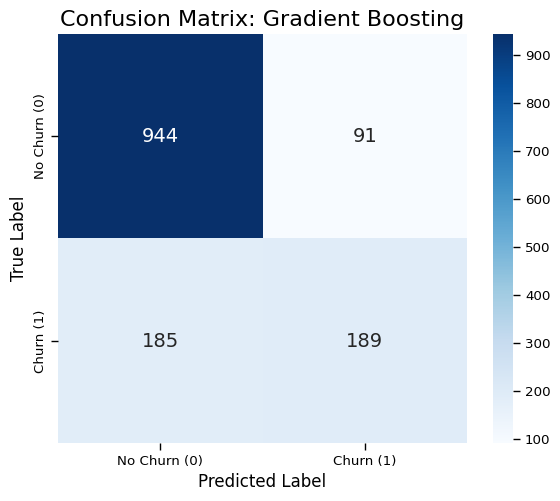

In [183]:
best_model_name = max(results, key=lambda x: results[x]['auc_roc'])
cm = confusion_matrix(y_test, results[best_model_name]['predictions'])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            annot_kws={'size': 14}, square=True)

plt.title(f'Confusion Matrix: {best_model_name}', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks([0.5, 1.5], ['No Churn (0)', 'Churn (1)'])
plt.yticks([0.5, 1.5], ['No Churn (0)', 'Churn (1)'])

plt.tight_layout()
plt.show()

### **Now clearly this is a one sided prediction and there many false negatives which was expected due to class imbalance**

In [184]:
weighted_models = {
    'Logistic Regression (Weighted)': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'Decision Tree (Weighted)': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest (Weighted)': RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced'),
    'Gradient Boosting (Weighted)': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'SVM (Weighted)': SVC(random_state=42, probability=True, class_weight='balanced')
}


from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight('balanced', y_train)
#we will have to manually calclate weights for gradient boost

weighted_results = {}

print(f"{'Model'} {'Recall Before'} {'Recall After'} {'Change'}")

for name, model in weighted_models.items():
    if 'Gradient Boosting' in name:
        model.fit(X_train_scaled, y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    weighted_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_roc': auc_roc,
        'predictions': y_pred,
        'model': model
    }
print(f"{name} {accuracy:.3f} {precision:.3f} {recall:.3f} {f1:.3f} {auc_roc:.3f}")

Model Recall Before Recall After Change
SVM (Weighted) 0.739 0.505 0.783 0.614 0.827


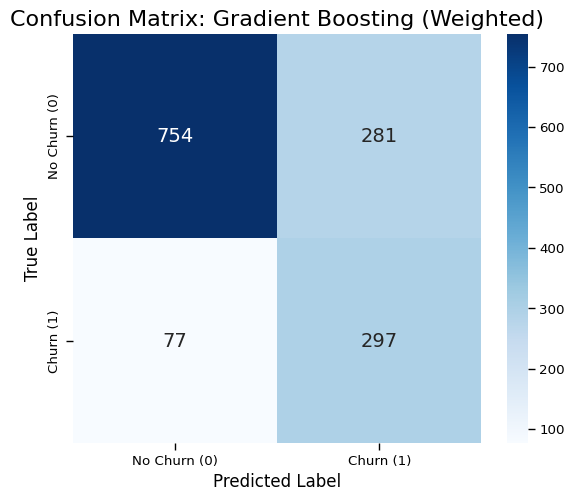

In [185]:
best_model_name = max(weighted_results, key=lambda x: weighted_results[x]['f1_score'])
cm = confusion_matrix(y_test, weighted_results[best_model_name]['predictions'])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            annot_kws={'size': 14}, square=True)

plt.title(f'Confusion Matrix: {best_model_name}', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks([0.5, 1.5], ['No Churn (0)', 'Churn (1)'])
plt.yticks([0.5, 1.5], ['No Churn (0)', 'Churn (1)'])

plt.tight_layout()
plt.show()

### **Now this is very very interesting!! What i observe here is that false negatives did reduce drastically from 185 to 77 but on the same end false positives also increased from 91 to 281, this is some kind of trade off i guess**

### **Now clearly these results are also not satisfactpry at all so we will try SMOTE and handle class imabalnce**

In [186]:
from imblearn.over_sampling import SMOTE
from collections import Counter


print(f"Class distribution {Counter(y_train)}")

#after using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"Class distribution {Counter(y_train_smote)}")

Class distribution Counter({0: 4139, 1: 1495})
Class distribution Counter({0: 4139, 1: 4139})


### **Now we will do model training on SMOTE data**

In [187]:
smote_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
}

smote_results = {}

print(f"{'Model'} {'Accuracy'} {'Precision'} {'Recall'} {'F1-Score'} {'AUC-ROC'}")
print("\n")

for name, model in smote_models.items():
    model.fit(X_train_smote, y_train_smote)

    #we will predict on original test set, because only that way we will get to know the real performance
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    smote_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_roc': auc_roc,
        'predictions': y_pred,
        'model': model
    }
print(f"{name} {accuracy:.3f} {precision:.3f} {recall:.3f} {f1:.3f} {auc_roc:.3f}")

Model Accuracy Precision Recall F1-Score AUC-ROC


Gradient Boosting 0.771 0.554 0.695 0.617 0.837


### **We see that gradient boosting is performing the best**

### **Comparing all the approaches applied yet**

In [188]:
gb_original = results['Gradient Boosting']
gb_weighted = weighted_results['Gradient Boosting (Weighted)']
gb_smote = smote_results['Gradient Boosting']

best_smote = max(smote_results, key=lambda x: smote_results[x]['f1_score'])
print(f"\nBest SMOTE model: {best_smote}")
print(f"Precision: {smote_results[best_smote]['precision']:.3f}")
print(f"Recall: {smote_results[best_smote]['recall']:.3f}")
print(f"F1-Score: {smote_results[best_smote]['f1_score']:.3f}")


Best SMOTE model: Gradient Boosting
Precision: 0.554
Recall: 0.695
F1-Score: 0.617


### **Visualising results through confusion matrix**

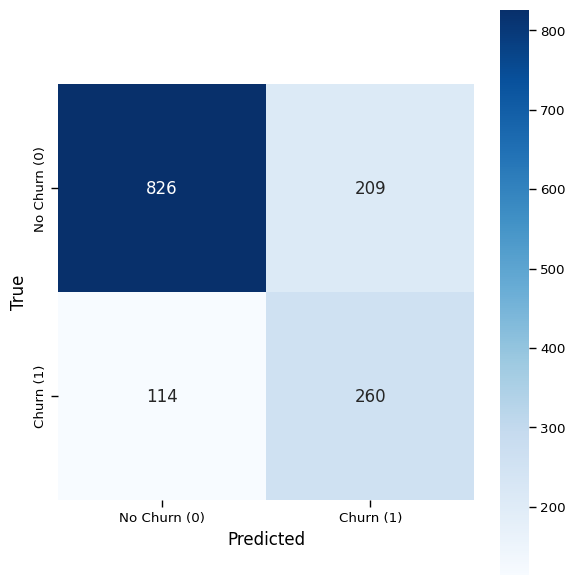

In [189]:
best_smote_cm = confusion_matrix(y_test, smote_results[best_smote]['predictions'])

plt.figure(figsize=(6, 6))
sns.heatmap(best_smote_cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            annot_kws={'size':12}, square=True)

plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.xticks([0.5, 1.5], ['No Churn (0)', 'Churn (1)'])
plt.yticks([0.5, 1.5], ['No Churn (0)', 'Churn (1)'])

plt.tight_layout()
plt.show()

### **Validation using k-fold cross validation**

In [190]:
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold

cv_models = [
    ('Logistic Regression', LogisticRegression(random_state=42, max_iter=1000)),
    ('Random Forest', RandomForestClassifier(random_state=42, n_estimators=100)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42, n_estimators=100))
]


acc_results = []
auc_results = []
recall_results = []
names = []

result_col = ["Algorithm", "ROC AUC Mean", "ROC AUC STD", "Accuracy Mean", "Accuracy STD", "Recall Mean", "Recall STD"]
model_results = pd.DataFrame(columns=result_col)

i = 0
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for name, model in cv_models:
    cv_acc_results = model_selection.cross_val_score(model, X_train_smote, y_train_smote,
                    cv=skfold, scoring="accuracy")
    cv_auc_results = model_selection.cross_val_score(model, X_train_smote, y_train_smote,
                    cv=skfold, scoring="roc_auc")
    cv_recall_results = model_selection.cross_val_score(model, X_train_smote, y_train_smote,
                    cv=skfold, scoring="recall")

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    recall_results.append(cv_recall_results)

    model_results.loc[i] = [name,
                           round(cv_auc_results.mean()*100, 2),
                           round(cv_auc_results.std()*100, 2),
                           round(cv_acc_results.mean()*100, 2),
                           round(cv_acc_results.std()*100, 2),
                           round(cv_recall_results.mean()*100, 2),
                           round(cv_recall_results.std()*100, 2)]
    i += 1


model_results_sorted = model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

### **Visualising these results**

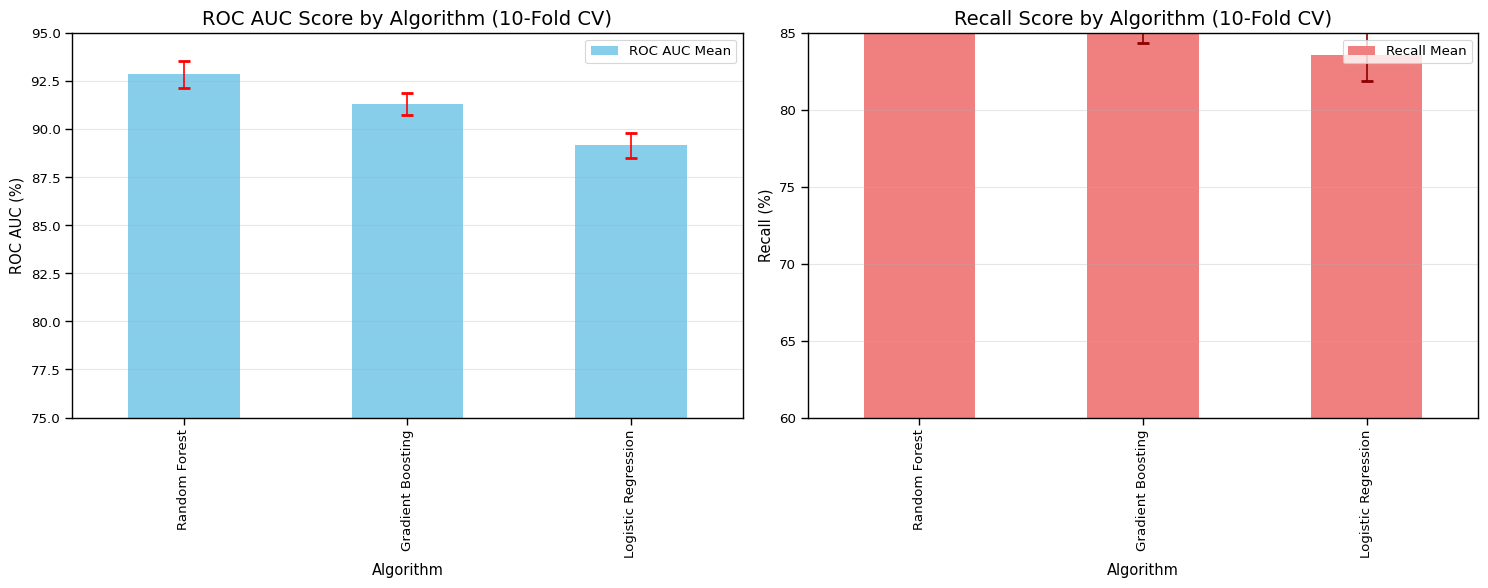

In [191]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

#roc auc scores
model_results_sorted.plot(x='Algorithm', y='ROC AUC Mean', kind='bar', ax=ax1,
                         yerr='ROC AUC STD', capsize=4, color='skyblue',
                         error_kw={'ecolor': 'red', 'capthick': 2})
ax1.set_title('ROC AUC Score by Algorithm (10-Fold CV)', fontsize=14)
ax1.set_ylabel('ROC AUC (%)')
ax1.set_ylim(75, 95)
ax1.grid(axis='y', alpha=0.3)

#recall scores
model_results_sorted.plot(x='Algorithm', y='Recall Mean', kind='bar', ax=ax2,
                         yerr='Recall STD', capsize=4, color='lightcoral',
                         error_kw={'ecolor': 'darkred', 'capthick': 2})
ax2.set_title('Recall Score by Algorithm (10-Fold CV)', fontsize=14)
ax2.set_ylabel('Recall (%)')
ax2.set_ylim(60, 85)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### **We can also use Voting Classifier to get better performance**

In [192]:
from sklearn.ensemble import VotingClassifier

#creating models to combine
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(random_state=42, max_iter=1000)

#creating a voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model),
        ('lr', lr_model)
    ],
    voting='soft'
)


voting_clf.fit(X_train_smote, y_train_smote)

y_pred_voting = voting_clf.predict(X_test_scaled)
y_pred_proba_voting = voting_clf.predict_proba(X_test_scaled)[:, 1]

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_voting),
    'Precision': precision_score(y_test, y_pred_voting),
    'Recall': recall_score(y_test, y_pred_voting),
    'F1-Score': f1_score(y_test, y_pred_voting),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_voting)
}


for metric, value in metrics.items():
    print(f"{metric}: {value:.3f}")

Accuracy: 0.767
Precision: 0.549
Recall: 0.676
F1-Score: 0.606
ROC-AUC: 0.839


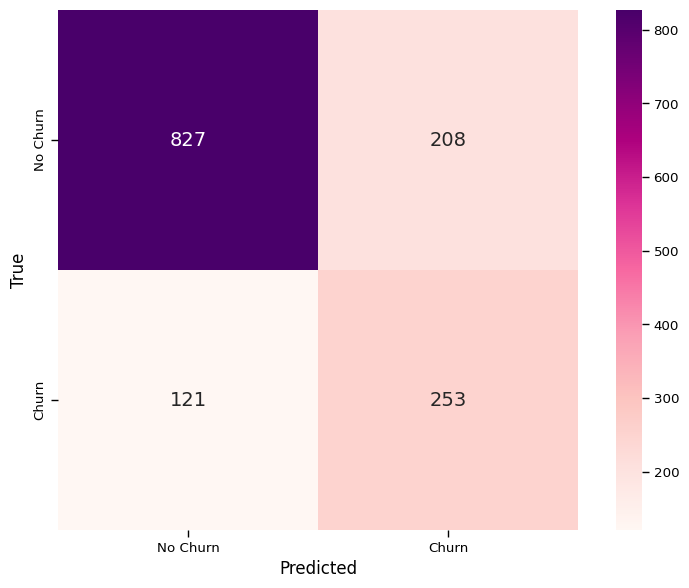

In [193]:
cm_voting = confusion_matrix(y_test, y_pred_voting)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='RdPu', cbar=True,
            annot_kws={'size': 14}, square=True)

plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.xticks([0.5, 1.5], ['No Churn', 'Churn'])
plt.yticks([0.5, 1.5], ['No Churn', 'Churn'])

plt.tight_layout()
plt.show()

### **Here what i observe is that there is always a trade off between recall and precision, when we are trying to improve one other is getting affected**

### **Checking for overfitting**

In [194]:
train_pred = voting_clf.predict(X_train_scaled)
train_pred_proba = voting_clf.predict_proba(X_train_scaled)[:, 1]

test_pred = voting_clf.predict(X_test_scaled)
test_pred_proba = voting_clf.predict_proba(X_test_scaled)[:, 1]

metrics = {
    'Train': {
        'Accuracy': accuracy_score(y_train, train_pred),
        'Recall': recall_score(y_train, train_pred),
        'ROC-AUC': roc_auc_score(y_train, train_pred_proba)
    },
    'Test': {
        'Accuracy': accuracy_score(y_test, test_pred),
        'Recall': recall_score(y_test, test_pred),
        'ROC-AUC': roc_auc_score(y_test, test_pred_proba)
    }
}
print(f"{'Metric'} {'Train'} {'Test'} {'Difference'}")

for metric in ['Accuracy', 'Recall', 'ROC-AUC']:
    train_score = metrics['Train'][metric]
    test_score = metrics['Test'][metric]
    diff = train_score - test_score
    print(f"{metric:<15} {train_score:<10.3f} {test_score:<10.3f} {diff:<10.3f}")

Metric Train Test Difference
Accuracy        0.878      0.767      0.112     
Recall          0.866      0.676      0.190     
ROC-AUC         0.959      0.839      0.120     


### **Now i do observe some overfitting here so lets regularise this and handle overfitting**

### **We can use regularisation techniques to do so**

In [195]:
#regularised random forest
rf_regularized = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    min_samples_split=50,
    min_samples_leaf=20,
    max_features='sqrt',
    random_state=42
)

#regularised gradient boosting
gb_regularized = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=4,
    min_samples_split=50,
    min_samples_leaf=20,
    subsample=0.8,
    random_state=42
)

#regularised logistic regression
lr_regularized = LogisticRegression(
    C=0.1,
    random_state=42,
    max_iter=1000
)

#creating a new regularised voting classifier
voting_regularized = VotingClassifier(
    estimators=[
        ('rf', rf_regularized),
        ('gb', gb_regularized),
        ('lr', lr_regularized)
    ],
    voting='soft'
)

#now training
voting_regularized.fit(X_train_smote, y_train_smote)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=8,
                                                     min_samples_leaf=20,
                                                     min_samples_split=50,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(max_depth=4,
                                                         min_samples_leaf=20,
                                                         min_samples_split=50,
                                                         random_state=42,
                                                         subsample=0.8)),
                             ('lr',
                              LogisticRegression(C=0.1, max_iter=1000,
                                                 random_state=42))],
                 voting='soft')

In [196]:
models_compare = {
    'Original Voting': voting_clf,
    'Regularized Voting': voting_regularized
}

for name, model in models_compare.items():
    #train metrics
    train_pred = model.predict(X_train_scaled)
    train_proba = model.predict_proba(X_train_scaled)[:, 1]
    train_acc = accuracy_score(y_train, train_pred)
    train_recall = recall_score(y_train, train_pred)
    train_auc = roc_auc_score(y_train, train_proba)

    #test metrics
    test_pred = model.predict(X_test_scaled)
    test_proba = model.predict_proba(X_test_scaled)[:, 1]
    test_acc = accuracy_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_f1 = f1_score(y_test, test_pred)
    test_auc = roc_auc_score(y_test, test_proba)

    #difference to check overfitting again
    acc_gap = train_acc - test_acc
    recall_gap = train_recall - test_recall
    auc_gap = train_auc - test_auc

    print(f"{'Metric'} {'Train'} {'Test'} {'Gap'}")
    print(f"{'Accuracy'} {train_acc:.3f} {test_acc:.3f} {acc_gap:.3f}")
    print(f"{'Recall'} {train_recall:.3f} {test_recall:.3f} {recall_gap:.3f}")
    print(f"{'F1-Score'}{test_f1:.3f}")
    print(f"{'ROC-AUC'} {train_auc:.3f} {test_auc:.3f} {auc_gap:.3f}")

    if name == 'Regularized Voting':
        reg_test_recall = test_recall
        reg_test_f1 = test_f1
        reg_auc_gap = auc_gap

    print('\n')

Metric Train Test Gap
Accuracy 0.878 0.767 0.112
Recall 0.866 0.676 0.190
F1-Score0.606
ROC-AUC 0.959 0.839 0.120


Metric Train Test Gap
Accuracy 0.793 0.759 0.034
Recall 0.775 0.725 0.050
F1-Score0.615
ROC-AUC 0.872 0.842 0.030




### **We observe good improvements!! Now this little gap left out is also because of SMOTE and is not exactly overfitting so we are good to go**

### **I also tried doing hyperparameter tuning but did not finally go through with it. Here are the results:**

*   Accuracy: 0.767
*   Precision:0.548
*   Recall: 0.684

### **Accuracy and precision got a slight increase which wasnt that noticable.**
### **Also, the recall decreased...which was the reason that i did not go through with it**






### **So i will finalise my reguralised voting classifier model now which is giving considerably good results**

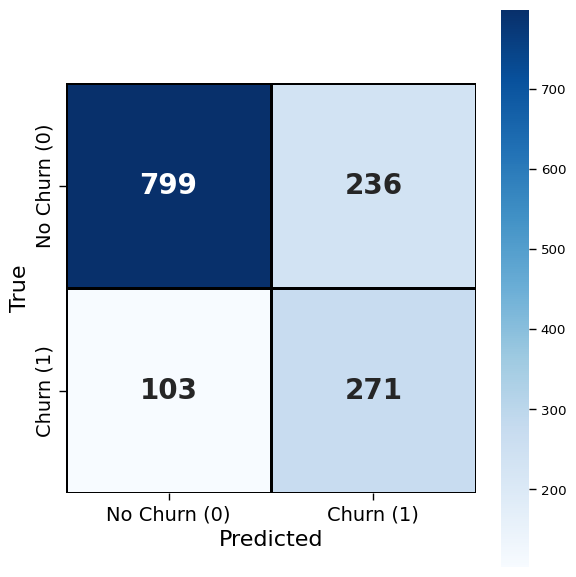

In [197]:
y_final_pred = voting_regularized.predict(X_test_scaled)
y_final_proba = voting_regularized.predict_proba(X_test_scaled)[:, 1]


cm_final = confusion_matrix(y_test, y_final_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', cbar=True,
            annot_kws={'size': 20, 'weight': 'bold'}, square=True, linewidths=2, linecolor='black')

plt.xlabel('Predicted', fontsize=16)
plt.ylabel('True', fontsize=16)
plt.xticks([0.5, 1.5], ['No Churn (0)', 'Churn (1)'], fontsize=14)
plt.yticks([0.5, 1.5], ['No Churn (0)', 'Churn (1)'], fontsize=14)

plt.tight_layout()
plt.show()

In [198]:
final_metrics = {
    'Accuracy': accuracy_score(y_test, y_final_pred),
    'Precision': precision_score(y_test, y_final_pred),
    'Recall': recall_score(y_test, y_final_pred),
    'F1-Score': f1_score(y_test, y_final_pred),
    'ROC-AUC': roc_auc_score(y_test, y_final_proba)
}

metric_df = pd.DataFrame(final_metrics, index=['Value']).T

In [199]:
metric_df

,Value
Accuracy,0.759404
Precision,0.534517
Recall,0.724599
F1-Score,0.615210
ROC-AUC,0.841729


### **My model is performing better as compared to models that i could find on the internet so i think i can conclude my model building**

### **Saving the model to make strealit app**

In [200]:
import pickle

with open('churn_model.pkl', 'wb') as f:
    pickle.dump({
        'model': voting_regularized,
        'scaler': scaler,
        'label_encoders': encoders,
        'feature_names': X_train.columns.tolist()
    }, f)

### **Identifying key churn drivers**

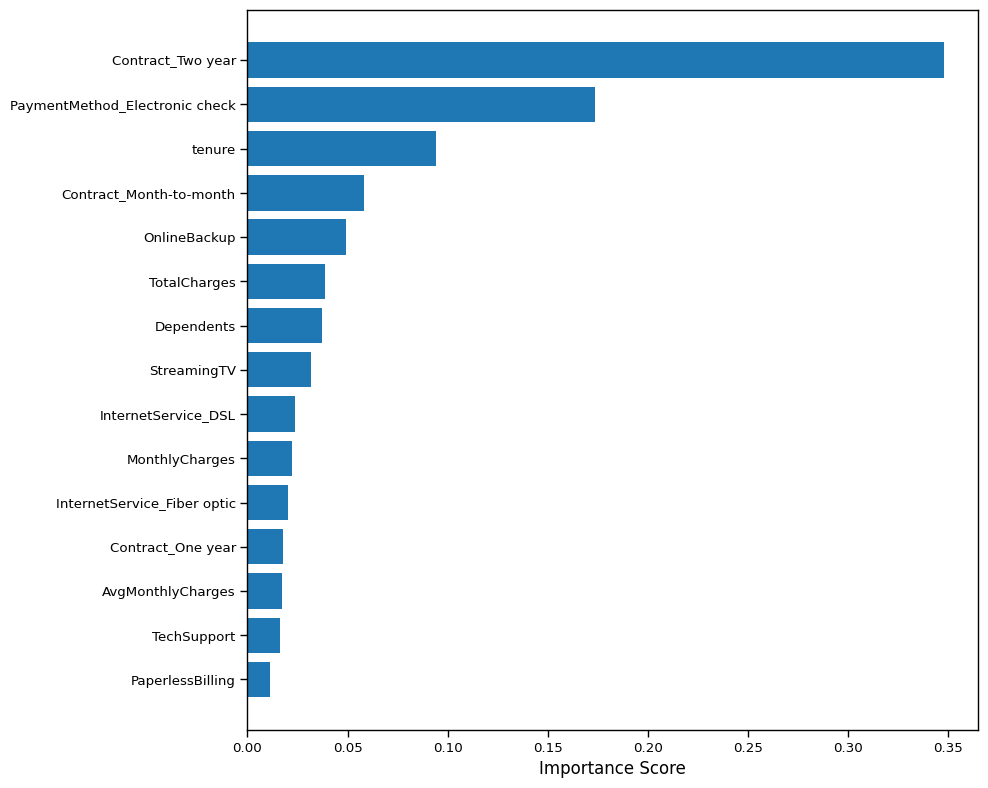

In [201]:
rf_model = voting_regularized.estimators_[0][1]
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

plt.figure(figsize=(10, 8))
plt.barh(feature_importance['feature'][::-1], feature_importance['importance'][::-1])
plt.xlabel('Importance Score', fontsize=12)
plt.tight_layout()
plt.show()

## **Business Insights that i conclude from my working and analysis**

### **Bill payment method, tenure and monthly charge are very important factors**

### **There are various places that we can improve the way we work**

### **Segements that are at high risk of churn are:**
*   People on month to month contracts
*   Senior Citizens
*   Fiber Optic users with high charges

### **We can maybe introduce plans or schemes that favour senior citizens and also should work on fiber optic pricing to remove that factor too**

### **Various other such factors are also included in EDA part of the project**



## **With this, I complete my project following is the pipeline i followed:**


### **1.   Data Preprocessing and EDA**
### **2.   Feature Engineering (created new features that significantly helped my model)**
### **3.   Handling class imbalance using SMOTE**
### **4.   Training multiple models in multiple iterations to check which works best**
### **5.   Evaluation using K Fold Cross Validation**
### **6.   Addressing overfitting using regularisation techniques**
### **7.   Trying out hyperparameter Tuning**
### **8.   Model Summary and Business Insights that i concluded**
